**Web Scraping**

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []
for i in range(1, pages + 1):
  print(f"Scraping page {i}")
  # Create URL to collect links from paginated data
  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
  # Collect HTML data from this page
  response = requests.get(url)
  # Parse content
  content = response.content
  parsed_content = BeautifulSoup(content, 'html.parser')
  for para in parsed_content.find_all("div", {"class": "text_content"}):
      reviews.append(para.get_text())
  print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
# viewing reviews in the dataframe
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Boarding was difficult caus...
1,✅ Trip Verified | Boarding started with a del...
2,✅ Trip Verified | Absolutely horrible custome...
3,Not Verified | BA is not what it used to be! ...
4,"✅ Trip Verified | BA First, it's not even the..."
...,...
995,✅ Trip Verified | London to Vancouver. Check ...
996,✅ Trip Verified | The First Class zone at Heat...
997,✅ Trip Verified | I had a miserable experienc...
998,✅ Trip Verified | Leeds Bradford to Las Vegas...


In [72]:
# converting df to csv file and saving
df.to_csv("/content/drive/MyDrive/Data Science/Project/British airways/data/BA_reviews.csv")

**Sentimental Analysis using Vader**

In [7]:
# importing useful library functions
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
#reading & printing csv file
df = pd.read_csv("/content/drive/MyDrive/Data Science/Practice Data/BA_reviews.csv")
print(df)
print(df.iloc[0])
print(df.iat[0,1])
print("type",type(df.iat[0,1]))

     Unnamed: 0                                            reviews
0             0  ✅ Trip Verified |  Absolutely horrible custome...
1             1  Not Verified |  BA is not what it used to be! ...
2             2  ✅ Trip Verified |  BA First, it's not even the...
3             3  ✅ Trip Verified |  The worst business class ex...
4             4  Not Verified |  Quite possibly the worst busin...
..          ...                                                ...
995         995  ✅ Trip Verified |  I had a miserable experienc...
996         996  ✅ Trip Verified |  Leeds Bradford to Las Vegas...
997         997  ✅ Trip Verified |  Dallas to London Heathrow i...
998         998  ✅ Trip Verified |  Tenerife to Heathrow. Effec...
999         999  ✅ Trip Verified | Heathrow to Larnaca - depart...

[1000 rows x 2 columns]
Unnamed: 0                                                    0
reviews       ✅ Trip Verified |  Absolutely horrible custome...
Name: 0, dtype: object
✅ Trip Verified |  A

**Data Cleaning:** Tokenization, Lemmitization, Text cleaning, Normalization, stop word removal

In [8]:
#Applying Vader sentimenatal analysis model
import nltk
nltk.download('vader_lexicon')
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to clean text
def clean_text(text):
    # Remove special characters and punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # print(lemmatized_tokens)
    ans = " ".join(lemmatized_tokens)
    return ans

# Function to get sentiment using VADER
def get_vader_sentiment(text):
    text = clean_text(text)
    # Get polarity scores
    scores = sid.polarity_scores(text)
    # Classify as positive, negative, or neutral based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis to the cleaned text
df['vader_sentiment'] = df['reviews'].apply(get_vader_sentiment)

# Display the first few rows of the DataFrame with VADER sentiment analysis results
print(df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               reviews vader_sentiment
0    ✅ Trip Verified |  Boarding was difficult caus...        Positive
1    ✅ Trip Verified |  Boarding started with a del...        Positive
2    ✅ Trip Verified |  Absolutely horrible custome...        Negative
3    Not Verified |  BA is not what it used to be! ...        Positive
4    ✅ Trip Verified |  BA First, it's not even the...        Positive
..                                                 ...             ...
995  ✅ Trip Verified |  London to Vancouver. Check ...        Positive
996  ✅ Trip Verified | The First Class zone at Heat...        Positive
997  ✅ Trip Verified |  I had a miserable experienc...        Negative
998  ✅ Trip Verified |  Leeds Bradford to Las Vegas...        Positive
999  ✅ Trip Verified |  Dallas to London Heathrow i...        Positive

[1000 rows x 2 columns]


In [9]:
# Get insights from sentiment analysis

sentiment_counts = df['vader_sentiment'].value_counts()
# print("\nSentiment Distribution:")
print("sentiment counts")
print(sentiment_counts)

# Calculate the percentage of positive, negative, and neutral sentiments
total_reviews = len(df)
positive_percentage = (sentiment_counts['Positive'] / total_reviews) * 100
negative_percentage = (sentiment_counts['Negative'] / total_reviews) * 100
neutral_percentage = (sentiment_counts['Neutral'] / total_reviews) * 100

print("\nPositive Sentiment Percentage: {:.2f}%".format(positive_percentage))
print("Negative Sentiment Percentage: {:.2f}%".format(negative_percentage))
print("Neutral Sentiment Percentage: {:.2f}%".format(neutral_percentage))

sentiment counts
Positive    558
Negative    421
Neutral      21
Name: vader_sentiment, dtype: int64

Positive Sentiment Percentage: 55.80%
Negative Sentiment Percentage: 42.10%
Neutral Sentiment Percentage: 2.10%


Data Visualization

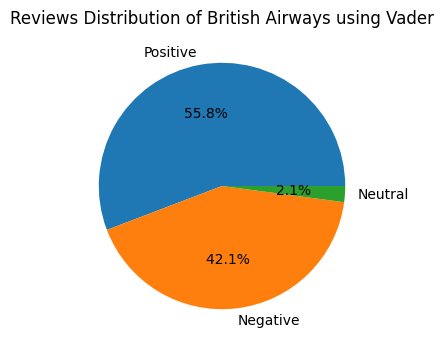

In [10]:
# Create a pandas Series from the data
data = pd.Series(sentiment_counts, index=['Positive', 'Negative', 'Neutral'], name='vader_sentiment')

# Create the pie chart
plt.figure(figsize=(4, 4))  # Set figure size
# plt.pie(data.values, labels=data.index, autopct="%1.1f%%")  # Set labels and percentage format
plt.pie(data.values, labels=data.index, autopct="%1.1f%% ")  # Set labels, percentage format, and font size
plt.title("Reviews Distribution of British Airways using Vader")
plt.show()


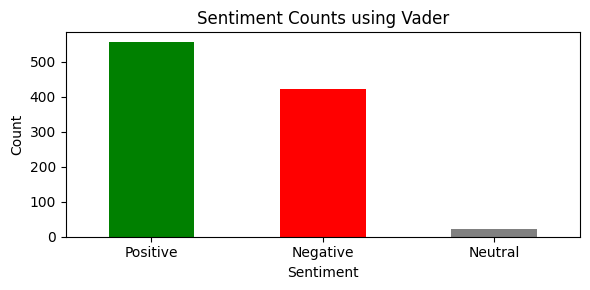

In [11]:
# Create a pandas Series from the data
data = pd.Series([557, 422, 21], index=['Positive', 'Negative', 'Neutral'], name='vader_sentiment')

# Create the bar chart
plt.figure(figsize=(6, 3))  # Set figure size
bars = data.plot(kind='bar', color=['green', 'red', 'gray'])  # Set bar colors

plt.title("Sentiment Counts using Vader")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing between elements
plt.show()

**Conclusion:** British Airways appears to be delivering a service that generally satisfies a majority of its customers but the fact that around 42.2% have neagtive sentiments towards the service can not be ignored.

In [13]:
# Filter negative reviews
negative_reviews = df[df['vader_sentiment'] == 'Negative']['reviews']


# Filter positive reviews
positive_reviews = df[df['vader_sentiment'] == 'Positive']['reviews']


**Topic Modelling of Negative reviews using Word2Vec Model**

In [14]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import string
# Preprocess negative reviews
stop_words = set(stopwords.words('english'))
preprocessed_reviews = []
for review in negative_reviews:
    # Tokenize words and remove punctuation
    tokens = word_tokenize(review.lower())
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    preprocessed_reviews.append(tokens)
print(type(str(preprocessed_reviews)))

# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Find similar words or phrases
similar_words = model.wv.most_similar('bad', topn=10)

print("Words similar to 'bad':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

<class 'str'>
Words similar to 'bad':
ba: 0.9996360540390015
got: 0.9995912909507751
get: 0.9995869994163513
online: 0.9995790719985962
call: 0.9995695948600769
seats: 0.9995649456977844
airline: 0.9995637536048889
luggage: 0.9995631575584412
people: 0.9995613098144531
back: 0.9995589256286621


The similarity score ranges from 0 to 1, where a higher score indicates a stronger similarity between the two words.

*Luggage:* This word suggests that issues related to luggage, such as baggage handling or storage, are commonly mentioned alongside negative experiences.

*Seat, Crew, Food, Flight:* These words indicating that negative reviews often mention problems related to seating comfort, crew behavior, food quality, and overall flight experience.

*Last, Also, Would, Flights, Service, Time, One, Bag, Made, Travel, Money, Staff, Never, Experience:* These words are moderately to highly similar to 'bad', suggesting that various aspects of the travel experience, such as timing, service quality, expenses, and staff behavior, are commonly associated with negative reviews.

In [81]:
pip install --upgrade wordcloud


Word cloud for negative reviews

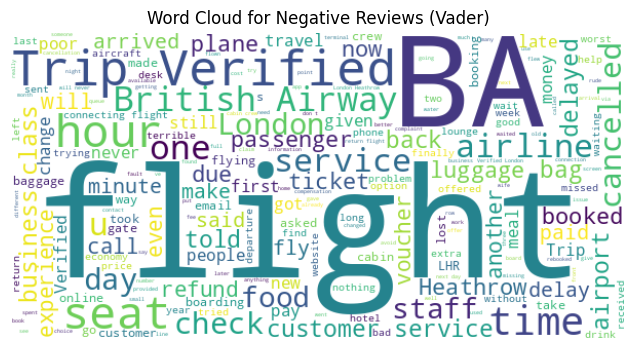

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Preprocess text data (remove punctuation, convert to lowercase, etc.)
# Here, you can use your own text preprocessing function if needed

# Concatenate text data into a single string
negative_text = ' '.join(negative_reviews)
# print(negative_text)

# Generate word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(negative_text)
# print(wordcloud)

# Plot word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews (Vader)')
plt.show()

**Topic Modelling of Positive reviews using Word2Vec Model**

In [16]:
# Preprocess positive reviews
stop_words = set(stopwords.words('english'))
preprocessed_reviews = []
for review in positive_reviews:
    # Tokenize words and remove punctuation
    tokens = word_tokenize(review.lower())
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    preprocessed_reviews.append(tokens)

# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Find similar words or phrases
similar_words = model.wv.most_similar('good', topn=10)

print("Words similar to 'good':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Words similar to 'good':
food: 0.9998394250869751
drinks: 0.999816358089447
cabin: 0.9998053312301636
great: 0.9998002648353577
well: 0.9997937679290771
service: 0.999792754650116
nice: 0.9997894167900085
meal: 0.9997862577438354
served: 0.9997779130935669
offered: 0.9997730851173401


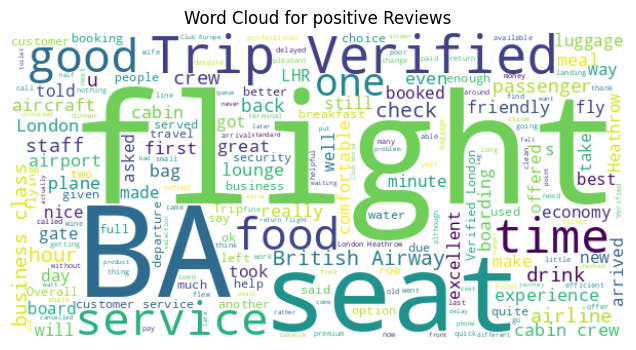

In [84]:
# Concatenate text data into a single string
positive_text = ' '.join(positive_reviews)

# Generate word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(positive_text)

def color_func(word, font_size, position, random_state):
  # Import colors library (assuming you have it installed)
  import colorsys

  # Define base color and brightness range
  base_color = (1, 1, 0.7)  # Adjust hue and saturation for your base color (yellow-ish)
  brightness_range = 0.3  # Adjust this value to control the brightness shift

  # Get HSV color representation
  h, s, v = colorsys.rgb_to_hsv(*base_color)

  # Increase brightness within the range
  v = min(v + brightness_range, 1.0)  # Clamp brightness to 1.0

  # Convert back to RGB
  final_color = colorsys.hsv_to_rgb(h, s, v)

  return final_color

# Plot word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for positive Reviews')
plt.show()

In [85]:
pip install https://huggingface.co/spacy/en_core_web_sm/resolve/main/en_core_web_sm-any-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.9 MB/s eta 0:00:00


In [19]:
# Using spacy.load().
import spacy
nlp = spacy.load("en_core_web_sm")

# Importing as module.
import en_core_web_sm
nlp = en_core_web_sm.load()

**TextBlob's sentiment analysis**

Analyzing reviews and returning sentiment scores between -1 (negative) and 1 (positive).

In [20]:
import spacy
from textblob import TextBlob

nlp = spacy.load("en_core_web_sm")

def sentiment_score(review):
  """
  This function analyzes a review and returns a sentiment score between -1 (negative) and 1 (positive).

  Args:
      review: The review text to be analyzed.

  Returns:
      A float value between -1 (negative) and 1 (positive) representing the sentiment score.
  """
  doc = nlp(review)
  blob = TextBlob(review)

  # Leverage spaCy for noun phrase sentiment analysis (optional)
  # noun_phrase_sentiment = 0
  # for chunk in doc.noun_chunks:
  #   noun_phrase_sentiment += chunk.sentiment.polarity

  # Use TextBlob's sentiment analysis
  sentiment = blob.sentiment.polarity

  # Combine scores (optional, adjust weights as needed)
  # final_score = (sentiment + noun_phrase_sentiment) / 2

  return sentiment
# Adding one more column of sentiment scores
sentiment_scores = []
# Process each review and print sentiment scores
for review in df['reviews']:
  score = sentiment_score(review)
  sentiment_scores.append(score)
df['sentiment_scores'] = sentiment_scores
print(df)
  # print(f"Review: {review}")
  # print(f"Sentiment Score: {score:.2f}")
  # print("-" * 50)

                                               reviews vader_sentiment  \
0    ✅ Trip Verified |  Boarding was difficult caus...        Positive   
1    ✅ Trip Verified |  Boarding started with a del...        Positive   
2    ✅ Trip Verified |  Absolutely horrible custome...        Negative   
3    Not Verified |  BA is not what it used to be! ...        Positive   
4    ✅ Trip Verified |  BA First, it's not even the...        Positive   
..                                                 ...             ...   
995  ✅ Trip Verified |  London to Vancouver. Check ...        Positive   
996  ✅ Trip Verified | The First Class zone at Heat...        Positive   
997  ✅ Trip Verified |  I had a miserable experienc...        Negative   
998  ✅ Trip Verified |  Leeds Bradford to Las Vegas...        Positive   
999  ✅ Trip Verified |  Dallas to London Heathrow i...        Positive   

     sentiment_scores  
0           -0.011190  
1            0.128674  
2           -0.175000  
3            0.

In [21]:
# Adding one more column named "review_label" specifies positive, negative & neutral reviews according to classified sentiment scores
def sentiment_label(score):
  score = float(score)
  """
  This function assigns sentiment labels ("positive", "neutral", or "negative")
  based on the sentiment score range.

  Args:
      score: The sentiment score (float)

  Returns:
      A string representing the sentiment label ("positive", "neutral", or "negative")
  """
  if score > 0.01:
    return "positive"
  elif score <= -0.0:
    return "negative"
  else:
    return "neutral"

# Add a new column named "sentiment" with sentiment labels
df['review_label'] = df['sentiment_scores'].apply(sentiment_label)

# Print the DataFrame
print(df)

                                               reviews vader_sentiment  \
0    ✅ Trip Verified |  Boarding was difficult caus...        Positive   
1    ✅ Trip Verified |  Boarding started with a del...        Positive   
2    ✅ Trip Verified |  Absolutely horrible custome...        Negative   
3    Not Verified |  BA is not what it used to be! ...        Positive   
4    ✅ Trip Verified |  BA First, it's not even the...        Positive   
..                                                 ...             ...   
995  ✅ Trip Verified |  London to Vancouver. Check ...        Positive   
996  ✅ Trip Verified | The First Class zone at Heat...        Positive   
997  ✅ Trip Verified |  I had a miserable experienc...        Negative   
998  ✅ Trip Verified |  Leeds Bradford to Las Vegas...        Positive   
999  ✅ Trip Verified |  Dallas to London Heathrow i...        Positive   

     sentiment_scores review_label  
0           -0.011190     negative  
1            0.128674     positive  


In [22]:
# Get insights from sentiment score function

review_label_counts = df['review_label'].value_counts()
print("review_label_count")
print(review_label_counts)

# Calculate the percentage of positive, negative, and neutral sentiments
total_reviews = len(df)
positive_percentage = (review_label_counts['positive'] / total_reviews) * 100
negative_percentage = (review_label_counts['negative'] / total_reviews) * 100
neutral_percentage = (review_label_counts['neutral'] / total_reviews) * 100

print("\nPositive Review Percentage: {:.2f}%".format(positive_percentage))
print("Negative Review Percentage: {:.2f}%".format(negative_percentage))
print("Neutral Review Percentage: {:.2f}%".format(neutral_percentage))

review_label_count
positive    606
negative    364
neutral      30
Name: review_label, dtype: int64

Positive Review Percentage: 60.60%
Negative Review Percentage: 36.40%
Neutral Review Percentage: 3.00%


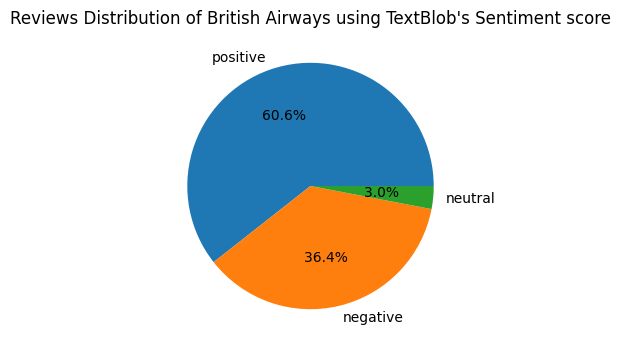

In [23]:
# Create a pandas Series from the data
data = pd.Series(review_label_counts, index=['positive', 'negative', 'neutral'], name='review_label')

# Create the pie chart
plt.figure(figsize=(4, 4))  # Set figure size
# plt.pie(data.values, labels=data.index, autopct="%1.1f%%")  # Set labels and percentage format
plt.pie(data.values, labels=data.index, autopct="%1.1f%% ")  # Set labels, percentage format, and font size
plt.title("Reviews Distribution of British Airways using TextBlob's Sentiment score ")
plt.show()

In [24]:
# Filter negative reviews
neg_reviews = df[df['review_label'] == 'negative']['reviews']


# Filter positive reviews
pos_reviews = df[df['review_label'] == 'positive']['reviews']

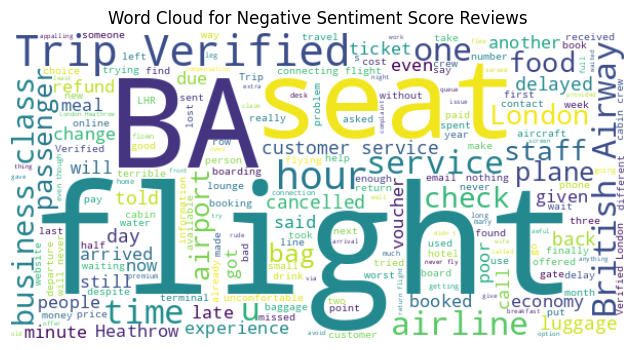

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Preprocess text data (remove punctuation, convert to lowercase, etc.)
# Here, you can use your own text preprocessing function if needed

# Concatenate text data into a single string
neg_text = ' '.join(neg_reviews)
# print(negative_text)

# Generate word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(neg_text)
# print(wordcloud)

# Plot word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Score Reviews')
plt.show()

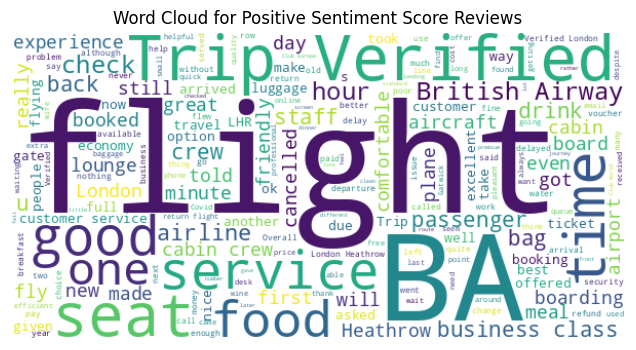

In [26]:
# Concatenate text data into a single string
pos_text = ' '.join(pos_reviews)
# print(negative_text)

# Generate word cloud
wordcloud = WordCloud(width=600, height=300, background_color='white').generate(pos_text)
# print(wordcloud)

# Plot word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Score Reviews')
plt.show()

In [29]:
# Preprocess positive reviews
stop_words = set(stopwords.words('english'))
preprocessed_reviews = []
for review in pos_reviews:
    # Tokenize words and remove punctuation
    tokens = word_tokenize(review.lower())
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    preprocessed_reviews.append(tokens)

# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Find similar words or phrases
similar_words = model.wv.most_similar('good', topn=10)

print("Words similar to 'good':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Words similar to 'good':
food: 0.9998241662979126
great: 0.9998214244842529
seat: 0.9998152852058411
however: 0.9997930526733398
excellent: 0.9997925758361816
offered: 0.9997923374176025
really: 0.9997918009757996
also: 0.9997904896736145
board: 0.9997791051864624
meal: 0.9997767806053162


In [95]:
# Preprocess negative reviews
stop_words = set(stopwords.words('english'))
preprocessed_reviews = []
for review in neg_reviews:
    # Tokenize words and remove punctuation
    tokens = word_tokenize(review.lower())
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    preprocessed_reviews.append(tokens)

# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Find similar words or phrases
similar_words = model.wv.most_similar('bad', topn=10)

print("Words similar to 'bad':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Words similar to 'bad':
seat: 0.9993050694465637
service: 0.9992921948432922
one: 0.9992603063583374
experience: 0.9992537498474121
passengers: 0.9992477893829346
ba: 0.9992280602455139
flight: 0.9992274641990662
flights: 0.9992106556892395
airline: 0.9991996884346008
back: 0.9991984963417053


A brief comparison between **Vader sentimental analysis** & **Sentimental score function Analysis**